# Boolean Indexing

## 1. 조건 인덱싱

### 1.1. 단일 조건 인덱싱

In [9]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

color      director_name  \
movie_title                                                            
Avatar                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Spectre                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                      602.0     148.0   
The Dark Knight Rises                                        813.0     164.0   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                      161.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                         Rory Kinnear   
The Dark Knight Rises                         Christian Bale   
Star Wars: Episode VII - The Force Awakens        Rob Walker   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                    11000.0   
The Dark Knight Rises                                      27000.0   
Star Wars: Episode VII - The Force Awakens                   131.0   

                                                  gross  \
movie_title                                               
Avatar                                      760505847.0   
Pirates of the Caribbean: At World's End    309404152.0   
Spectre                                     200074175.0   
The Dark Knight Rises                       448130642.0   
Star Wars: Episode VII - The Force Awakens          NaN   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                           Action|Adventure|Thriller   
The Dark Knight Rises                                       Action|Thriller   
Star Wars: Episode VII - The Force Awakens                      Documentary   

                                                   ...           \
movie_title   

In [6]:
movie_hours = movie['duration']>120
movie_hours.sum()

1039

In [7]:
movie_hours.mean()

0.2113506916192026

In [10]:
movie['duration'].gt(120).mean() # gt() ~ 이상

0.2113506916192026

In [11]:
# 결측치 제거 후
movie['duration'].dropna().gt(120).mean() # gt() ~ 이상

0.21199755152009794

### 1.2. 다중 조건 인덱싱

In [17]:
cr1 = movie.imdb_score>8
cr2 = movie.content_rating == 'PG-13'
cr3 = ((movie.title_year < 2000) | (movie.title_year>2009))
# Pandas 논리연산자 [AND(&), OR(I), NOT(~)]
# 기본 연산자를 사용할 경우 객체 전체의 참을 계산하기 때문에
# 각 표현은 괄호로 묶여 있어야 오류가 발생하지 않음.

In [18]:
cr = cr1& cr2 & cr3
cr.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

### 1.3. 조건 기반 필터링

In [19]:
movie[cr].head()

color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   
Interstellar                Color  Christopher Nolan                   712.0   

                            duration  director_facebook_likes  \
movie_title                                                     
The Dark Knight Rises          164.0                  22000.0   
The Avengers                   173.0                      0.0   
Captain America: Civil War     147.0                     94.0   
Guardians of the Galaxy        121.0                    571.0   
Interstellar                   169.0                  22000.0   

                            actor_3_facebook_likes        actor_2_name  \
movie_title                                                              
The Dark Knight Rises                      23000.0      Christian Bale   
The Avengers                               19000.0   Robert Downey Jr.   
Captain America: Civil War                 11000.0  Scarlett Johansson   
Guardians of the Galaxy                     3000.0          Vin Diesel   
Interstellar                                6000.0       Anne Hathaway   

                            actor_1_facebook_likes        gross  \
movie_title                                                       
The Dark Knight Rises                      27000.0  448130642.0   
The Avengers                               26000.0  623279547.0   
Captain America: Civil War                 21000.0  407197282.0   
Guardians of the Galaxy                    14000.0  333130696.0   
Interstellar                               11000.0  187991439.0   

                                             genres         ...           \
movie_title                                                 ...            
The Dark Knight Rises               Action|Thriller         ...            
The Avengers                Action|Adventure|Sci-Fi         ...            
Captain America: Civil War  Action|Adventure|Sci-Fi         ...            
Guardians of the Galaxy     Action|Adventure|Sci-Fi         ...            
Interstellar                 Adventure|Drama|Sci-Fi         ...            

                           num_user_for_reviews  language  country  \
movie_title                                                          
The Dark Knight Rises                    2701.0   English      USA   
The Avengers                             1722.0   English      USA   
Captain America: Civil War               1022.0   English      USA   
Guardians of the Galaxy                  1097.0   English      USA   
Interstellar                             2725.0   English      USA   

                           content_rating       budget title_year  \
movie_title                                                         
The Dark Knight Rises               PG-13  250000000.0     2012.0   
The Avengers                        PG-13  220000000.0     2012.0   
Captain America: Civil War          PG-13  250000000.0     2016.0   
Guardians of the Galaxy             PG-13  170000000.0     2014.0   
Interstellar                        PG-13  165000000.0     2014.0   

                           actor_2_facebook_likes  imdb_score aspect_ratio  \
movie_title                                                                  
The Dark Knight Rises                     23000.0         8.5         2.35   
The Avengers                              21000.0         8.1         1.85   
Captain America: Civil War                19000.0         8.2         2.35   
Guardians of the Galaxy                   14000.0         8.1         2.35   
Interstellar                              1100

In [20]:
cols = ['imdb_score', 'content_rating','title_year']
movie.loc[cr, cols].head()

imdb_score content_rating  title_year
movie_title                                                      
The Dark Knight Rises              8.5          PG-13      2012.0
The Avengers                       8.1          PG-13      2012.0
Captain America: Civil War         8.2          PG-13      2016.0
Guardians of the Galaxy            8.1          PG-13      2014.0
Interstellar                       8.6          PG-13      2014.0

In [16]:
movie.iloc[cr.values, range(10)].head()

color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   
Interstellar                Color  Christopher Nolan                   712.0   

                            duration  director_facebook_likes  \
movie_title                                                     
The Dark Knight Rises          164.0                  22000.0   
The Avengers                   173.0                      0.0   
Captain America: Civil War     147.0                     94.0   
Guardians of the Galaxy        121.0                    571.0   
Interstellar                   169.0                  22000.0   

                            actor_3_facebook_likes        actor_2_name  \
movie_title                                                              
The Dark Knight Rises                      23000.0      Christian Bale   
The Avengers                               19000.0   Robert Downey Jr.   
Captain America: Civil War                 11000.0  Scarlett Johansson   
Guardians of the Galaxy                     3000.0          Vin Diesel   
Interstellar                                6000.0       Anne Hathaway   

                            actor_1_facebook_likes        gross  \
movie_title                                                       
The Dark Knight Rises                      27000.0  448130642.0   
The Avengers                               26000.0  623279547.0   
Captain America: Civil War                 21000.0  407197282.0   
Guardians of the Galaxy                    14000.0  333130696.0   
Interstellar                               11000.0  187991439.0   

                                             genres  
movie_title                                          
The Dark Knight Rises               Action|Thriller  
The Avengers                Action|Adventure|Sci-Fi  
Captain America: Civil War  Action|Adventure|Sci-Fi  
Guardians of the Galaxy     Action|Adventure|Sci-Fi  
Interstellar                 Adventure|Drama|Sci-Fi

## 2. 인덱스 기반 조건 사용

In [23]:
college = pd.read_csv('data/college.csv')
college.head()

INSTNM        CITY STABBR  HBCU  MENONLY  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
2                   Amridge University  Montgomery     AL   0.0      0.0   
3  University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
4             Alabama State University  Montgomery     AL   1.0      0.0   

   WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           
2        0.0         1       NaN       NaN           1.0         ...           
3        0.0         0     595.0     590.0           0.0         ...           
4        0.0         0     425.0     430.0           0.0         ...           

   UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   
2     0.0000    0.0000     0.2715    0.4536         1   0.6801    0.7795   
3     0.0172    0.0332     0.0350    0.2146         1   0.3072    0.4596   
4     0.0098    0.0243     0.0137    0.0892         1   0.7347    0.7554   

   UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  
2   0.8540            40100               23370  
3   0.2640            45500               24097  
4   0.1270            26600             33118.5  

[5 rows x 27 columns]

In [28]:
%timeit college[college['STABBR'] == 'TX']
# 밀리초(ms) 1/ 1,000 초
# 마이크로초(us) 1/1,000,000 초

2.63 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
college2 = college.set_index('STABBR')

In [30]:
%timeit college2.loc['TX']

965 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
college.index = college['CITY'] +',' + college['STABBR']
college = college.sort_index()
college.head()

INSTNM      CITY STABBR  HBCU  MENONLY  \
ARTESIA,CA           Angeles Institute   ARTESIA     CA   0.0      0.0   
Aberdeen,SD       Presentation College  Aberdeen     SD   0.0      0.0   
Aberdeen,SD  Northern State University  Aberdeen     SD   0.0      0.0   
Aberdeen,WA       Grays Harbor College  Aberdeen     WA   0.0      0.0   
Abilene,TX   Hardin-Simmons University   Abilene     TX   0.0      0.0   

             WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
ARTESIA,CA         0.0         0       NaN       NaN           0.0   
Aberdeen,SD        0.0         1     440.0     480.0           0.0   
Aberdeen,SD        0.0         0     480.0     475.0           0.0   
Aberdeen,WA        0.0         0       NaN       NaN           0.0   
Abilene,TX         0.0         1     508.0     515.0           0.0   

                    ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
ARTESIA,CA          ...             0.0175    0.0088     0.0088    0.0000   
Aberdeen,SD         ...             0.0284    0.0142     0.0823    0.2865   
Aberdeen,SD         ...             0.0219    0.0425     0.0024    0.1872   
Aberdeen,WA         ...             0.0937    0.0009     0.0250    0.1820   
Abilene,TX          ...             0.0298    0.0159     0.0102    0.0685   

             CURROPER  PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
ARTESIA,CA          1   0.6275    0.8138   0.5429              NaN   
Aberdeen,SD         1   0.4829    0.7560   0.3097            35900   
Aberdeen,SD         1   0.2272    0.4303   0.1766            33600   
Aberdeen,WA         1   0.4530    0.1502   0.5087            27000   
Abilene,TX          1   0.3256    0.5547   0.0982            38700   

             GRAD_DEBT_MDN_SUPP  
ARTESIA,CA                16850  
Aberdeen,SD               25000  
Aberdeen,SD               24847  
Aberdeen,WA               11490  
Abilene,TX                25864  

[5 rows x 27 columns]

In [32]:
college.loc['Miami,FL'].head()

INSTNM   CITY STABBR  HBCU  \
Miami,FL        New Professions Technical Institute  Miami     FL   0.0   
Miami,FL               Management Resources College  Miami     FL   0.0   
Miami,FL                   Strayer University-Doral  Miami     FL   NaN   
Miami,FL                   Keiser University- Miami  Miami     FL   NaN   
Miami,FL  George T Baker Aviation Technical College  Miami     FL   0.0   

          MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
Miami,FL      0.0        0.0         0       NaN       NaN           0.0   
Miami,FL      0.0        0.0         0       NaN       NaN           0.0   
Miami,FL      NaN        NaN         1       NaN       NaN           NaN   
Miami,FL      NaN        NaN         1       NaN       NaN           NaN   
Miami,FL      0.0        0.0         0       NaN       NaN           0.0   

                 ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
Miami,FL         ...             0.0000       0.0        0.0    0.4464   
Miami,FL         ...             0.0000       0.0        0.0    0.0000   
Miami,FL         ...                NaN       NaN        NaN       NaN   
Miami,FL         ...                NaN       NaN        NaN       NaN   
Miami,FL         ...             0.0046       0.0        0.0    0.5686   

          CURROPER  PCTPELL  PCTFLOAN  UG25ABV    MD_EARN_WNE_P10  \
Miami,FL         1   0.8701    0.6780   0.8358              18700   
Miami,FL         1   0.4239    0.5458   0.8698  PrivacySuppressed   
Miami,FL         1      NaN       NaN      NaN              49200   
Miami,FL         1      NaN       NaN      NaN              29700   
Miami,FL         1   0.2567    0.0000   0.4366              38600   

          GRAD_DEBT_MDN_SUPP  
Miami,FL                8682  
Miami,FL               12182  
Miami,FL             36173.5  
Miami,FL               26063  
Miami,FL   PrivacySuppressed  

[5 rows x 27 columns]

## 3. 주가 탐색 그래프 생성

In [10]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

Open   High    Low  Close    Volume
Date                                            
2010-01-04  66.39  67.20  66.12  67.11   5771234
2010-01-05  66.99  67.62  66.73  67.30   7366270
2010-01-06  67.17  68.94  67.03  68.80   9949946
2010-01-07  68.49  69.81  68.21  69.51   7700297
2010-01-08  69.19  72.00  69.09  70.65  13487621

In [11]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[0.1, 0.9]) 
# 10%에서 90% 사이를 보고자 할때
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [12]:
up_10 = slb_summary.loc['90%']
low_10 = slb_summary.loc['10%']
criteria = (slb_close < low_10) | (slb_close > up_10)
slb_10 = slb_close[criteria]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

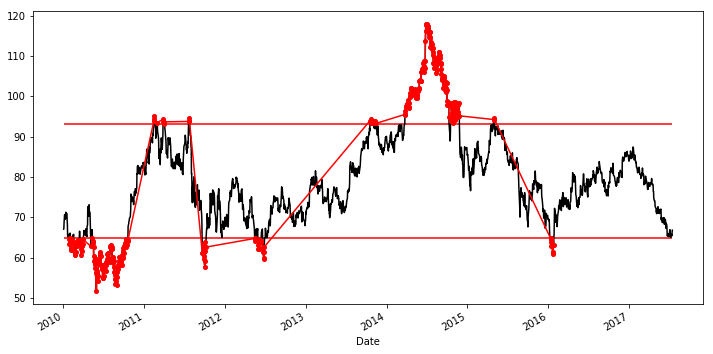

In [37]:
slb_close.plot(color='black', figsize=(12,6))
slb_10.plot(marker='o', ms=4, color='red')
xmin=criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[low_10, up_10], xmin=xmin, xmax=xmax, color='red')

# Boolean Indexing II

## 1. 데이터필터링

### 1.1. 포함관계

In [19]:
employee = pd.read_csv('data/employee.csv')

In [20]:
employee.DEPARTMENT.value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
General Services Department        22
Housing and Community Devp.        22
Dept of Neighborhoods (DON)        17
Legal Department                   17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
City Controller's Office            5
Mayor's Office                      5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [21]:
depts = ['Houston Fire Department (HFD)', 'Library']

In [22]:
# isin: Dataframe의 컬럼에서 어떤 list의 값을 포함하고 있는것만 걸러낼 때
c_depts = employee.DEPARTMENT.isin(depts)
c_gender = employee.GENDER == 'Female'

In [23]:
employee.loc[c_depts&c_gender].head()

UNIQUE_ID             POSITION_TITLE                     DEPARTMENT  \
1            1          LIBRARY ASSISTANT                        Library   
61          61         IT PROJECT MANAGER  Houston Fire Department (HFD)   
101        101     CUSTOMER SERVICE CLERK                        Library   
135        135               FIRE FIGHTER  Houston Fire Department (HFD)   
225        225  ADMINISTRATIVE SPECIALIST  Houston Fire Department (HFD)   

     BASE_SALARY                       RACE EMPLOYMENT_TYPE  GENDER  \
1        26125.0            Hispanic/Latino       Full Time  Female   
61       96668.0  Black or African American       Full Time  Female   
101          NaN                        NaN       Part Time  Female   
135      51194.0            Hispanic/Latino       Full Time  Female   
225      58040.0            Hispanic/Latino       Full Time  Female   

    EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
1              Active  2000-07-19  2010-09-18  
61             Active  1998-04-07  2006-01-28  
101            Active  2016-02-29  2016-02-29  
135            Active  2009-07-27  2010-10-27  
225            Active  1995-05-23  2015-11-21

In [24]:
c_sal = employee.BASE_SALARY.between(80000, 120000)

In [25]:
employee.loc[c_depts&c_gender&c_sal].head()

UNIQUE_ID                            POSITION_TITLE  \
61           61                        IT PROJECT MANAGER   
1165       1165  DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV   

                         DEPARTMENT  BASE_SALARY                       RACE  \
61    Houston Fire Department (HFD)      96668.0  Black or African American   
1165                        Library     107763.0  Black or African American   

     EMPLOYMENT_TYPE  GENDER EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
61         Full Time  Female            Active  1998-04-07  2006-01-28  
1165       Full Time  Female            Active  1993-11-16  2014-03-15

### 1.2. Query 메서드

In [26]:
qs = "DEPARTMENT in @depts and GENDER == 'Female' and 80000 <= BASE_SALARY <= 120000"
employee.query(qs)
# 변수 앞에 '@'문자를 붙이면 변수를 참조 할 수 있습니다

UNIQUE_ID                            POSITION_TITLE  \
61           61                        IT PROJECT MANAGER   
1165       1165  DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV   

                         DEPARTMENT  BASE_SALARY                       RACE  \
61    Houston Fire Department (HFD)      96668.0  Black or African American   
1165                        Library     107763.0  Black or African American   

     EMPLOYMENT_TYPE  GENDER EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
61         Full Time  Female            Active  1998-04-07  2006-01-28  
1165       Full Time  Female            Active  1993-11-16  2014-03-15

### 1.3. 값을 유지하면서 필터링

In [46]:
%matplotlib inline

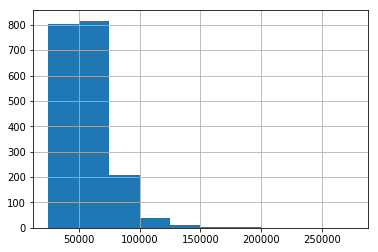

In [47]:
employee.BASE_SALARY.hist()

In [48]:
(employee.BASE_SALARY<100000).mean()

0.914

In [49]:
c = (employee.BASE_SALARY<100000)

In [50]:
employee.BASE_SALARY.where(c, other=100000).describe()

count      2000.000000
mean      57508.212500
std       20767.163526
min       24960.000000
25%       40799.500000
50%       55461.000000
75%       66614.000000
max      100000.000000
Name: BASE_SALARY, dtype: float64

In [51]:
employee.BASE_SALARY.clip(lower=30000, upper=200000).describe()
# clip : 하한, 상한 임계값 정하기

count      1886.000000
mean      55884.096501
std       21110.095969
min       30000.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      200000.000000
Name: BASE_SALARY, dtype: float64